 To build an ANN model for performing classification on a given MNIST dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.datasets import mnist
(features_train, targets_train), (features_test, targets_test) = mnist.load_data()
features_train, features_test = np.array(features_train, np.float32), np.array(features_test, np.float32)
features_train, features_test = features_train.reshape([-1, 784]), features_test.reshape([-1, 784])
features_train, features_test = features_train / 255., features_test / 255.
print(features_train)
print(targets_train)


11501568/11490434 [==============================] - 0s 0us/step
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[5 0 4 ... 5 6 8]


In [3]:
#  create feature and targets tensor for train set
torch_x_train = torch.from_numpy(features_train)
torch_y_train = torch.from_numpy(targets_train)
# create feature and targets tensor for test set.
torch_x_test = torch.from_numpy(features_test)
torch_y_test = torch.from_numpy(targets_test)

In [4]:
from  torch.utils.data import TensorDataset
batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)
# Pytorch train and test sets - Tensordataset
train_data=TensorDataset(torch_x_train,torch_y_train)
test_data=TensorDataset(torch_x_test,torch_y_test)

Text(0.5, 1.0, '4')

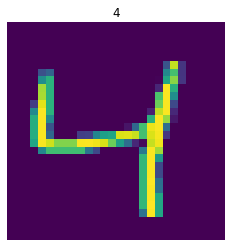

In [5]:
# data loader
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size,shuffle=False)
plt.imshow(features_train[2].reshape(28,28))
plt.axis('off')
plt.title(str(targets_train[2]))

In [6]:
# Create ANN Model
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
    def forward(self, x):
        # HL1 with relu activation
        out = self.relu(self.layer1(x))
        # HL2 with relu activation
        out = self.relu(self.layer2(out))
        # Output layer with LogSoftmax activation
        out = self.layer3(out)
        return out
# instantiate ANN
input_dim = 28*28
hidden_dim = 150 
output_dim = 10
# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)
print(model)
# Cross Entropy Loss
loss = nn.CrossEntropyLoss()
# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


ANNModel(
  (layer1): Linear(in_features=784, out_features=150, bias=True)
  (layer2): Linear(in_features=150, out_features=150, bias=True)
  (layer3): Linear(in_features=150, out_features=10, bias=True)
  (relu): ReLU()
)


In [7]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        # Clear gradients
        optimizer.zero_grad()
        # Forward propagation
        output=model(train)
        # Calculate softmax and cross entropy loss
        error = loss(output, labels)
        # Calculating gradients
        error.backward()
        # Update parameters
        optimizer.step()
        count += 1
        if count % 50 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            predicted=[]
            # Predict test dataset
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))
                # Forward propagation
                output=model(test)
                # Get predictions from the maximum value
                total=len(labels)
                # Total correct predictions
                prediction= torch.max(output.data, 1)[1]
                correct=(prediction==labels).sum()
            accuracy = 100 * correct / float(total)
            # store loss and iteration
            loss_list.append(error.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            print('Iteration: {} Loss: {} Accuracy: {} %'.format(count, error.data, accuracy))


Iteration: 500 Loss: 0.7607753276824951 Accuracy: 80.0 %
Iteration: 1000 Loss: 0.517021119594574 Accuracy: 87.0 %
Iteration: 1500 Loss: 0.5462396740913391 Accuracy: 86.0 %
Iteration: 2000 Loss: 0.2968066334724426 Accuracy: 90.0 %
Iteration: 2500 Loss: 0.2017800509929657 Accuracy: 90.0 %
Iteration: 3000 Loss: 0.32247915863990784 Accuracy: 89.0 %
Iteration: 3500 Loss: 0.24941959977149963 Accuracy: 91.0 %
Iteration: 4000 Loss: 0.2786637842655182 Accuracy: 91.0 %
Iteration: 4500 Loss: 0.4017125368118286 Accuracy: 91.0 %


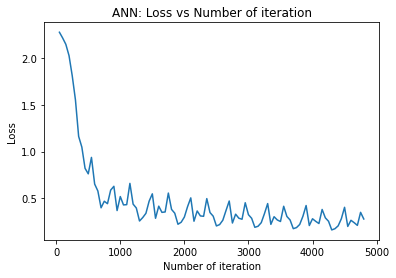

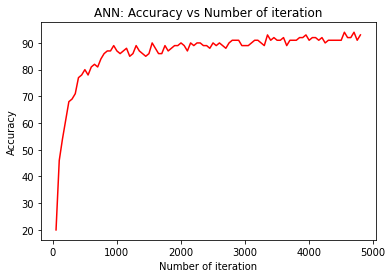

In [8]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()
# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()


Apply SVM on MNIST Dataset

In [9]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [10]:
from tensorflow.keras.datasets import mnist
(features_train, targets_train), (features_test, targets_test) = mnist.load_data()
features_train, features_test = features_train.reshape([-1, 784]), features_test.reshape([-1, 784])
features_train, features_test = features_train / 255., features_test / 255.
print(features_train.shape)
print(features_test.shape)
print(targets_train.shape)
print(targets_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [11]:
svm_classifier = svm.SVC()
svm_classifier.fit(features_train[:5000], targets_train[:5000])

SVC()

In [12]:
prediction = svm_classifier.predict(features_test)
print(prediction)

[7 2 1 ... 4 5 6]


In [13]:
from sklearn.metrics import accuracy_score

print("Accuracy - {}%".format(accuracy_score(y_pred=prediction, y_true=targets_test)*100))

Accuracy - 95.13000000000001%
